In [1]:
# Import das bibliotecas necessarias:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from cmcrameri import cm # Necessary to use ROMA color map - You migth want to comment this line and use other color map
import sys # Necessary to read the path of python codes' folder
import utm # If necessary to convert geographic to projected coordinates
mypath = sys.path.append('/home/romulo/my_project_dir/Inversao_magnetica/codes/modules/Real_Arraial/')
import auxiliars, filtering
from grids import my_regular, my_profile
from scipy.interpolate import griddata

In [2]:
import auxiliars, filtering

In [3]:
# Etapa 1 leitura dos dados via pandas (ou qualquer outra funcao do seu interesse):
nomes = ['X', 'Y', 'A', 'M']
data = pd.read_table('data_mag.cvs', sep=',', header=0, names = nomes)

In [4]:
data

,X,Y,A,M
0,-6000.000000,-6000.0,-50.0,0.004105
1,-5368.421053,-6000.0,-50.0,3.820191
2,-4736.842105,-6000.0,-50.0,9.303139
3,-4105.263158,-6000.0,-50.0,3.627860
4,-3473.684211,-6000.0,-50.0,12.062124
...,...,...,...,...
395,3473.684211,6000.0,-50.0,-5.826750
396,4105.263158,6000.0,-50.0,-6.105042
397,4736.842105,6000.0,-50.0,-2.025474
398,5368.421053,6000.0,-50.0,9.185439


In [5]:
print(data['M'].max())

109.9927310029422


In [6]:
# formato de grid:
shape = (20,20)

# convesao para array:
xgrid = np.array(data.X)
ygrid = np.array(data.Y)
ggrid = np.array(data.M)

# definicao do grid de entrada da funcao que fara a continuacao para cima:
xgrid = xgrid.reshape(shape)
ygrid = ygrid.reshape(shape)
ggrid = ggrid.reshape(shape)
print(ggrid.shape)
print(type(ggrid))

(20, 20)
<class 'numpy.ndarray'>


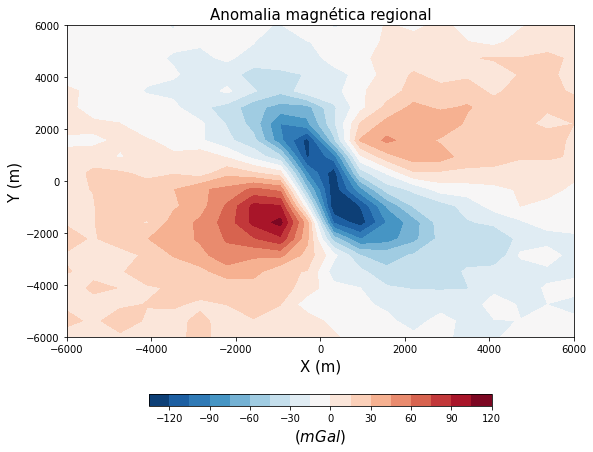

In [7]:
# visualizacao dos dados continuado:
plt.close('all')
fig = plt.figure(figsize=(20,7), facecolor='w')

plt.subplot(1,2,1)
plt.title('Anomalia magnética regional',fontsize=15)
plt.xlabel('X (m)', fontsize = 15)
plt.ylabel('Y (m)', fontsize = 15)
p1 = plt.contourf(xgrid, ygrid, ggrid, 20, cmap = plt.cm.RdBu_r)
cbar = plt.colorbar(p1, aspect=30, fraction = 0.03, orientation="horizontal")
cbar.set_label('$ (mGal) $',fontsize=15, rotation = 0)
plt.show()
#contourf

In [8]:
# definicao da nova altitude:
dz = 400.0
grav_up = filtering.my_continuation(xgrid, ygrid, ggrid, dz)

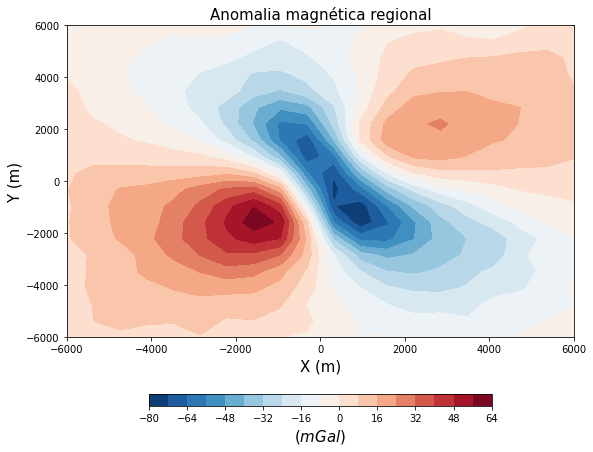

In [9]:
# visualizacao dos dados continuado:
plt.close('all')
fig = plt.figure(figsize=(20,7), facecolor='w')

plt.subplot(1,2,1)
plt.title('Anomalia magnética regional',fontsize=15)
plt.xlabel('X (m)', fontsize = 15)
plt.ylabel('Y (m)', fontsize = 15)
p1 = plt.contourf(xgrid, ygrid, grav_up, 20, cmap = plt.cm.RdBu_r)
cbar = plt.colorbar(p1, aspect=30, fraction = 0.03, orientation="horizontal")
cbar.set_label('$ (mGal) $',fontsize=15, rotation = 0)
plt.show()
#contourf

# Dado Real

In [10]:
# Os dados reais precisam estar em UTM
# Load data
x, y, mag = np.loadtxt('arraial_mag.dat', unpack = True)

# Setting area for Morro do Forno (northern anomaly)
area = (-42.025, -41.987,  -22.97, -22.93)

# Shape of new data and grid creation
shp = (51,11)
xi, yi, zi = my_regular(area, shp, -100.) # The *-200* value represent the flight level

# Interpolating the data and padding with zeros at the edge
di = griddata((x,y), mag, (xi,yi), method = 'linear') # If necessary, you might want to use *method='cubic' and *fill_value=0.*

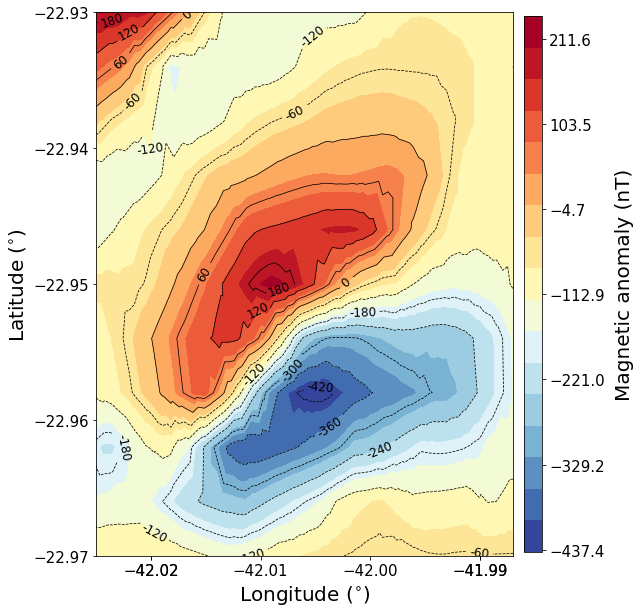

In [11]:
# Setting x and y axis for plotting
xx = np.around(np.linspace(xi.min(), xi.max(), 6), decimals = 2)
yy = np.around(np.linspace(yi.min(), yi.max(), 5), decimals = 2)

# Plotting data
plt.figure(figsize=(8,10))
cc = plt.tricontour(xi, yi, di, 10, colors = 'k', linewidths = 0.75)
cl = plt.clabel(cc, inline = 1, fontsize = 12, fmt = '%1.0f')
cs = plt.tricontourf(xi, yi, di, 20, cmap = plt.cm.RdYlBu_r, vmin = di.min(), vmax = di.max())
cb = plt.colorbar(cs, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'vertical', pad = 0.025)
cb.set_ticks(np.linspace(di.min(), di.max(), 7))
cb.set_label('Magnetic anomaly (nT)', fontsize = 20, labelpad = 10)
cb.ax.tick_params(labelsize = 15)
plt.xlabel('Longitude ($^{\circ}$)', fontsize = 20, labelpad = 5)
plt.ylabel('Latitude ($^{\circ}$)', fontsize = 20, labelpad = 5)
plt.xticks(xx, fontsize = 15)
plt.yticks(yy, fontsize = 15)
plt.show()

In [12]:
# Calculating Projected coordinates
xeast, ynorth, _, _ = utm.from_latlon(yi, xi)
print(xeast.shape)

(561,)


In [13]:
xeast = xeast.reshape(shp)
ynorth = ynorth.reshape(shp)
di = di.reshape(shp)

In [21]:
# definicao da nova altitude:
dz = 250.0
mag_up = filtering.my_continuation(xeast, ynorth, di, dz)
mag_up = mag_up.reshape(xi.shape)
print(mag_up.shape)

(561,)


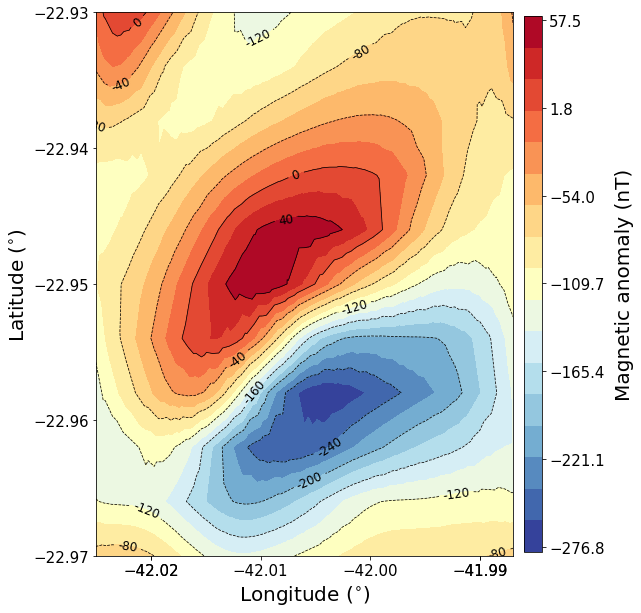

In [22]:
# Setting x and y axis for plotting
xx = np.around(np.linspace(xi.min(), xi.max(), 6), decimals = 2)
yy = np.around(np.linspace(yi.min(), yi.max(), 5), decimals = 2)

# Plotting data
plt.figure(figsize=(8,10))
cc = plt.tricontour(xi, yi, mag_up, 10, colors = 'k', linewidths = 0.75)
cl = plt.clabel(cc, inline = 1, fontsize = 12, fmt = '%1.0f')
cs = plt.tricontourf(xi, yi, mag_up, 20, cmap = plt.cm.RdYlBu_r, vmin = mag_up.min(), vmax = mag_up.max())
cb = plt.colorbar(cs, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'vertical', pad = 0.025)
cb.set_ticks(np.linspace(mag_up.min(), mag_up.max(), 7))
cb.set_label('Magnetic anomaly (nT)', fontsize = 20, labelpad = 10)
cb.ax.tick_params(labelsize = 15)
plt.xlabel('Longitude ($^{\circ}$)', fontsize = 20, labelpad = 5)
plt.ylabel('Latitude ($^{\circ}$)', fontsize = 20, labelpad = 5)
plt.xticks(xx, fontsize = 15)
plt.yticks(yy, fontsize = 15)
plt.show()

In [16]:
df = pd.DataFrame()
df['x'] = xi
df['y'] = yi
df['m'] = mag_up

In [17]:
df

,x,y,m
0,-42.025,-22.970,-88.696445
1,-42.025,-22.966,-105.038303
2,-42.025,-22.962,-113.820937
3,-42.025,-22.958,-112.806412
4,-42.025,-22.954,-106.170117
...,...,...,...
556,-41.987,-22.946,-95.228566
557,-41.987,-22.942,-89.848576
558,-41.987,-22.938,-82.832697
559,-41.987,-22.934,-76.161137


In [18]:
#df.to_csv('continuation_4000.csv', index = False,  header = True)